<a href="https://colab.research.google.com/github/daniellorieri/Estudos_E_Projetos_MachineLearn/blob/main/ModeloPrevisaoFraudeCartaoCredito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Objetivo
####Entender e resolver o problema de desbalanceamento na variavel resposta em problemas de classigficação binária.


##Dados
###https://www.kaggle.com/mlg-ulb/creditcardfraud

##Importação dos Dados

In [4]:
import pandas as pd
dados = pd.read_csv('/content/drive/My Drive/dataset/creditcard.csv')

In [5]:
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###Dicionário Variaveis
 - Amount = valor
 - Class = Classe (0=Compra Legítima) (1=Compra Fraude)

In [6]:
#contando os valores em cada uma das classes
dados['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
dados.shape

(284807, 31)

In [10]:
#Obter a proporção dividir pelo shape
dados['Class'].value_counts()/dados.shape[0]


0    0.998273
1    0.001727
Name: Class, dtype: float64

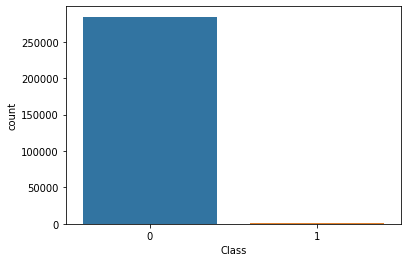

In [15]:
#Usando o gráfico de contagem para visualizar os dados.
import seaborn as sns
sns.countplot(x = dados['Class']);

#####Desbalanceamento, modelo acaba ficando tendencioso para uma das classes.

In [26]:
#SEPARAR O CONJUNTO DE DADOS EM DOIS
#PARA ISSO IREMOS FAZER UAM AMOSTRAGEM ESTRATIFICADA.

def AmostraEstratificada(dados, tamanho):
  n1 = round(tamanho*dados['Class'].mean())
  n0 = tamanho - n1

  zeros = dados[dados['Class'] == 0]
  uns = dados[dados['Class'] == 1]
  
  am0 = zeros.sample(n0)
  am1 = uns.sample(n1)

  amostra = pd.concat([am0, am1])
  resto = dados.drop(amostra.index)

  return amostra, resto




In [27]:
validacao, treinamento = AmostraEstratificada(dados, dados.shape[0] - 200000)

In [30]:
print(treinamento.shape)
print(treinamento['Class'].mean())

print(validacao.shape)
print(validacao['Class'].mean())


(200000, 31)
0.001725
(84807, 31)
0.0017333474831087057


In [31]:
!pip install pycaret

     |████████████████████████████████| 264 kB 7.6 MB/s 
     |████████████████████████████████| 2.0 MB 51.0 MB/s 
     |████████████████████████████████| 1.7 MB 71.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 111 kB 60.4 MB/s 
     |████████████████████████████████| 248 kB 60.1 MB/s 
     |████████████████████████████████| 14.6 MB 118 kB/s 
     |████████████████████████████████| 167 kB 59.1 MB/s 
     |████████████████████████████████| 1.3 MB 31.0 MB/s 
     |████████████████████████████████| 80 kB 7.8 MB/s 
     |████████████████████████████████| 6.8 MB 39.9 MB/s 
     |████████████████████████████████| 271 kB 55.3 MB/s 
     |████████████████████████████████| 56 kB 4.1 MB/s 
     |████████████████████████████████| 636 kB 45.3 MB/s 
     |████████████████████████████████| 62 kB 818 kB/s 
     |████████████████████

In [42]:
from pycaret.classification import setup, models, create_model, compare_models, tune_model, predict_model


In [43]:
#Configuracao da Modelagem automatica feita pelo PuyCaret
#Envolve os procedimentos de validação quanto de pré-processamento

modelagem = setup(data = treinamento,
                  target = 'Class',
                  test_data = validacao,
                  normalize = True)

,Description,Value
0,session_id,8207
1,Target,Class
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200000, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [37]:
modelos = ['et','rf','lightgbm','dt','lr','svm']

In [44]:
modelo = compare_models(include=modelos, sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9993,0.9220,0.7132,0.9085,0.7821,0.7817,0.7959,18.403
rf,Random Forest Classifier,0.9020,0.9156,0.7218,0.8409,0.7069,0.7063,0.7191,143.197
lr,Logistic Regression,0.9991,0.9251,0.5715,0.9080,0.6726,0.6722,0.7044,1.817
svm,SVM - Linear Kernel,0.9990,0.0000,0.5106,0.9060,0.6191,0.6187,0.6610,0.580
dt,Decision Tree Classifier,0.9012,0.7885,0.6755,0.6270,0.5890,0.5881,0.5948,12.737
lightgbm,Light Gradient Boosting Machine,0.9941,0.6719,0.4645,0.1885,0.2479,0.2460,0.2806,3.527


###UnderSamplig

In [53]:
def UnderSampling(dados, under = 1):
  classe0 =  dados[dados['Class'] == 0]
  classe1 =  dados[dados['Class'] == 1]

  amostra0 = classe0.sample(under * classe1.shape[0])
  under = pd.concat([amostra0, classe1])

  return under

In [62]:
#Controlar o nível de desbalanceamento.
under1 = UnderSampling(dados, 1)
under2 = UnderSampling(dados, 2) # Para cada transacao fraudulenta eu tenho 2 transacoes na fraude.
under5 = UnderSampling(dados, 5) # para cada transacao fraudulentos eu tenho 5 transacoes nao fraude.
under10 = UnderSampling(dados, 10)
under25 = UnderSampling(dados, 25)
under40 = UnderSampling(dados, 40)

print(under1.shape)
print(under2.shape)
print(under5.shape)
print(under10.shape)
print(under25.shape)
print(under40.shape)

(984, 31)
(1476, 31)
(2952, 31)
(5412, 31)
(12792, 31)
(20172, 31)


####Teste usando *Under*

In [57]:
#under1
modelagem = setup(data = under1,
                  target = 'Class',
                  test_data = validacao,
                  normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9441,0.9790,0.9066,0.9802,0.9402,0.8881,0.8930,0.369
et,Extra Trees Classifier,0.9410,0.9800,0.8944,0.9870,0.9363,0.8821,0.8887,0.718
lr,Logistic Regression,0.9390,0.9756,0.9045,0.9723,0.9354,0.8780,0.8826,0.033
rf,Random Forest Classifier,0.9380,0.9754,0.8944,0.9799,0.9336,0.8760,0.8813,0.620
svm,SVM - Linear Kernel,0.9288,0.0000,0.9024,0.9569,0.9262,0.8576,0.8631,0.019
dt,Decision Tree Classifier,0.8829,0.8830,0.8637,0.8918,0.8680,0.7658,0.7725,0.031


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9684,0.9997,1.0,0.052,0.0989,0.0959,0.2244


- Recaal esta em 1, esta bom.
- a Precisao foi para 5%. 
- Resultado taxa de acerto boa, mas a precisão muito ruim.

In [58]:
#under2
modelagem = setup(data = under2,
                  target = 'Class',
                  test_data = validacao,
                  normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9560,0.9742,0.8985,0.9690,0.9303,0.8984,0.9017,0.035
rf,Random Forest Classifier,0.9533,0.9760,0.8762,0.9824,0.9243,0.8909,0.8956,0.770
lightgbm,Light Gradient Boosting Machine,0.9505,0.9772,0.8843,0.9657,0.9208,0.8852,0.8892,0.353
et,Extra Trees Classifier,0.9512,0.9766,0.8681,0.9845,0.9206,0.8858,0.8912,0.508
svm,SVM - Linear Kernel,0.9431,0.0000,0.8782,0.9492,0.9101,0.8687,0.8721,0.022
dt,Decision Tree Classifier,0.9241,0.9137,0.8822,0.8933,0.8847,0.8283,0.8315,0.043


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9847,0.996,0.966,0.0992,0.1799,0.1773,0.307


In [59]:
#under5
modelagem = setup(data = under5,
                  target = 'Class',
                  test_data = validacao,
                  normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9763,0.9787,0.8615,0.9955,0.9215,0.9077,0.9124,0.561
lightgbm,Light Gradient Boosting Machine,0.9742,0.9770,0.8595,0.9840,0.9151,0.9001,0.9046,0.419
rf,Random Forest Classifier,0.9736,0.9752,0.8574,0.9814,0.9130,0.8976,0.9019,1.240
lr,Logistic Regression,0.9682,0.9636,0.8436,0.9619,0.8959,0.8773,0.8819,0.041
svm,SVM - Linear Kernel,0.9638,0.0000,0.8455,0.9328,0.8840,0.8627,0.8662,0.025
dt,Decision Tree Classifier,0.9526,0.9210,0.8736,0.8479,0.8592,0.8307,0.8318,0.089


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extra Trees Classifier,0.9985,1.0,1.0,0.5345,0.6967,0.696,0.7306


- recall -> modelo com boa taxa de acerto
- Precisao de 53% -> cada ver que o modelo diz que é fraude, tem 53% de chance de ser verdadeiro. Quando passa de 50%, não precisa nem de 2 tentativas para detectar uma fraude

In [60]:
#under10
modelagem = setup(data = under10,
                  target = 'Class',
                  test_data = validacao,
                  normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9861,0.9749,0.8575,0.9891,0.9162,0.9087,0.9129,2.265
et,Extra Trees Classifier,0.9852,0.9713,0.8472,0.9891,0.9099,0.9019,0.9068,0.672
lightgbm,Light Gradient Boosting Machine,0.9848,0.9755,0.8493,0.9819,0.9083,0.9002,0.9044,0.494
lr,Logistic Regression,0.9839,0.9766,0.8495,0.9700,0.9037,0.8950,0.8985,0.060
svm,SVM - Linear Kernel,0.9837,0.0000,0.8534,0.9639,0.9030,0.8942,0.8975,0.031
dt,Decision Tree Classifier,0.9743,0.9189,0.8513,0.8694,0.8565,0.8424,0.8447,0.193


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9991,0.9999,1.0,0.6592,0.7946,0.7942,0.8115


In [61]:
#under25
modelagem = setup(data = under25,
                  target = 'Class',
                  test_data = validacao,
                  normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9936,0.9691,0.8453,0.9848,0.9078,0.9045,0.9084,5.630
et,Extra Trees Classifier,0.9932,0.9725,0.8351,0.9847,0.9018,0.8983,0.9026,1.047
lightgbm,Light Gradient Boosting Machine,0.9930,0.9724,0.8391,0.9734,0.8990,0.8954,0.8992,0.700
lr,Logistic Regression,0.9913,0.9599,0.8050,0.9640,0.8740,0.8696,0.8751,0.107
svm,SVM - Linear Kernel,0.9911,0.0000,0.8089,0.9541,0.8718,0.8673,0.8724,0.059
dt,Decision Tree Classifier,0.9832,0.8733,0.7543,0.7903,0.7686,0.7599,0.7619,0.514


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9995,0.9999,1.0,0.7737,0.8724,0.8722,0.8794


-Precisao 0.77 --> de cada 4 ele acerta 3

In [63]:
#under40
modelagem = setup(data = under40,
                  target = 'Class',
                  test_data = validacao,
                  normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9952,0.9662,0.8230,0.9760,0.8905,0.8881,0.8927,9.532
et,Extra Trees Classifier,0.9948,0.9735,0.8010,0.9865,0.8792,0.8767,0.8841,1.434
lightgbm,Light Gradient Boosting Machine,0.9945,0.9747,0.7950,0.9774,0.8717,0.8690,0.8764,0.843
lr,Logistic Regression,0.9935,0.9555,0.7766,0.9457,0.8487,0.8454,0.8518,0.137
svm,SVM - Linear Kernel,0.9934,0.0000,0.7727,0.9421,0.8443,0.8410,0.8477,0.128
dt,Decision Tree Classifier,0.9880,0.8499,0.7047,0.7597,0.7228,0.7170,0.7214,0.786


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9996,0.9999,1.0,0.8167,0.8991,0.8989,0.9035


In [78]:
def UnderOverSampling(dados, under = 1, over = 1):
  classe0 =  dados[dados['Class'] == 0]
  classe1 =  dados[dados['Class'] == 1]

  amostra0 = classe0.sample(under * classe1.shape[0])
  amostra1 = pd.concat([classe1] * over, ignore_index=True)
  tudo = pd.concat([amostra0, classe1])
  

  return tudo

In [79]:
#Buscando um equilibrio misturando Under e Over.
underover1 = UnderOverSampling(dados, under = 20, over = 4)
underover2 = UnderOverSampling(dados, under = 20, over = 8)
underover3 = UnderOverSampling(dados, under = 20, over = 12)
underover4 = UnderOverSampling(dados, under = 20, over = 16)
underover5 = UnderOverSampling(dados, under = 20, over = 20)

print(under1.shape)
print(under2.shape)
print(under3.shape)
print(under4.shape)
print(under5.shape)


(2460, 31)
(4428, 31)
(6396, 31)
(8364, 31)
(10332, 31)


In [80]:
modelagem = setup(data = underover1, target = 'Class', test_data = validacao, normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9915,0.9697,0.8371,0.9809,0.9011,0.8967,0.9010,4.444
lightgbm,Light Gradient Boosting Machine,0.9914,0.9757,0.8371,0.9791,0.9003,0.8958,0.9000,0.688
et,Extra Trees Classifier,0.9908,0.9723,0.8190,0.9860,0.8919,0.8872,0.8929,1.175
svm,SVM - Linear Kernel,0.9895,0.0000,0.8251,0.9493,0.8800,0.8746,0.8785,0.043
lr,Logistic Regression,0.9896,0.9642,0.8110,0.9659,0.8784,0.8731,0.8785,0.087
dt,Decision Tree Classifier,0.9833,0.9168,0.8433,0.8141,0.8267,0.8179,0.8190,0.360


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9995,0.9999,1.0,0.7656,0.8673,0.867,0.8748


In [81]:
modelagem = setup(data = underover2, target = 'Class', test_data = validacao, normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9919,0.9689,0.8473,0.9798,0.9058,0.9016,0.9058,4.525
et,Extra Trees Classifier,0.9917,0.9750,0.8392,0.9848,0.9034,0.8991,0.9037,1.179
svm,SVM - Linear Kernel,0.9890,0.0000,0.8171,0.9453,0.8733,0.8677,0.8719,0.054
lr,Logistic Regression,0.9891,0.9551,0.7990,0.9667,0.8698,0.8642,0.8711,0.098
lightgbm,Light Gradient Boosting Machine,0.9889,0.9729,0.7893,0.9754,0.8566,0.8514,0.8640,0.688
dt,Decision Tree Classifier,0.9808,0.8784,0.7651,0.7986,0.7715,0.7622,0.7671,0.388


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9994,0.9999,1.0,0.7313,0.8448,0.8445,0.8549


In [84]:
modelagem = setup(data = underover3, target = 'Class', test_data = validacao, normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9918,0.9767,0.8432,0.9804,0.9048,0.9006,0.9043,0.637
rf,Random Forest Classifier,0.9918,0.9687,0.8412,0.9825,0.9044,0.9002,0.9042,4.411
et,Extra Trees Classifier,0.9915,0.9777,0.8330,0.9851,0.9006,0.8962,0.9008,0.863
lr,Logistic Regression,0.9901,0.9641,0.8151,0.9726,0.8842,0.8792,0.8843,0.092
svm,SVM - Linear Kernel,0.9899,0.0000,0.8110,0.9733,0.8817,0.8766,0.8822,0.054
dt,Decision Tree Classifier,0.9834,0.9168,0.8431,0.8155,0.8283,0.8196,0.8202,0.376


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9992,0.9999,1.0,0.6837,0.8122,0.8118,0.8265


In [82]:
modelagem = setup(data = underover4, target = 'Class', test_data = validacao, normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9923,0.9722,0.8534,0.9828,0.9108,0.9068,0.9107,0.635
rf,Random Forest Classifier,0.9921,0.9736,0.8473,0.9851,0.9080,0.9039,0.9083,4.479
et,Extra Trees Classifier,0.9918,0.9741,0.8391,0.9866,0.9042,0.8999,0.9046,0.895
lr,Logistic Regression,0.9901,0.9635,0.8131,0.9766,0.8834,0.8784,0.8845,0.086
svm,SVM - Linear Kernel,0.9887,0.0000,0.7909,0.9660,0.8645,0.8587,0.8662,0.055
dt,Decision Tree Classifier,0.9850,0.9167,0.8411,0.8450,0.8406,0.8328,0.8341,0.372


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9992,0.9999,1.0,0.6743,0.8055,0.8051,0.8208


In [83]:
modelagem = setup(data = underover5, target = 'Class', test_data = validacao, normalize = True)
modelo = compare_models(include = modelos, sort = 'F1')
pred = predict_model(modelo)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9923,0.9708,0.8453,0.9910,0.9098,0.9058,0.9103,4.411
lightgbm,Light Gradient Boosting Machine,0.9919,0.9783,0.8452,0.9818,0.9059,0.9017,0.9058,0.637
et,Extra Trees Classifier,0.9917,0.9737,0.8351,0.9883,0.9027,0.8984,0.9032,0.892
lr,Logistic Regression,0.9906,0.9658,0.8232,0.9773,0.8903,0.8855,0.8908,0.086
svm,SVM - Linear Kernel,0.9897,0.0000,0.8129,0.9697,0.8801,0.8749,0.8809,0.054
dt,Decision Tree Classifier,0.9831,0.9088,0.8268,0.8156,0.8179,0.8091,0.8109,0.386


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9994,0.9999,1.0,0.7387,0.8497,0.8494,0.8592


#### Under Over 1 mostrou os melhores resultados entre Recall e Precisão